### **PROJECT 3 PROPOSAL LEVEL 2**


**Idea: Fraud Detection**


 **Description:**


Fraud detection involves identifying and preventing deceptive activities within financial transactions or systems. Leveraging advanced analytics and machine learning techniques, fraud detection systems aim to distinguish between legitimate and fraudulent behavior. Key components include anomaly detection, pattern recognition, and real-time monitoring.


 **Dataset:-** https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud


 **Key Concepts and Challenges:**


1. Anomaly Detection: Identifying unusual patterns or deviations from normal behavior within data.


2. Machine Learning Models: Employing algorithms like Logistic Regression, Decision Trees, or Neural Networks for predictive analysis.


3. Feature Engineering: Selecting and transforming relevant features to enhance fraud detection accuracy.


4. Real-time Monitoring: Implementing systems that can detect and respond to fraudulent activities in real-time.


5. Scalability: Designing fraud detection systems capable of handling large volumes of transactions efficiently.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [2]:
#  Load Dataset
# -------------------------------------------------------------
df = pd.read_csv("creditcard.csv")
print("Dataset shape:", df.shape)
print(df['Class'].value_counts())

Dataset shape: (284807, 31)
Class
0    284315
1       492
Name: count, dtype: int64


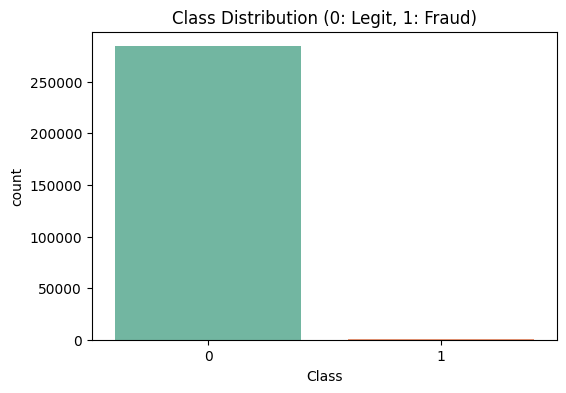

In [3]:
#  Exploratory Data Analysis
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df, hue='Class', palette='Set2', legend=False)
plt.title('Class Distribution (0: Legit, 1: Fraud)')
plt.show()

In [4]:
#  Data Preprocessing
# Split features and target
X = df.drop('Class', axis=1)
y = df['Class']

In [5]:
# Scale 'Amount' and 'Time'
scaler = StandardScaler()
X[['scaled_amount', 'scaled_time']] = scaler.fit_transform(X[['Amount', 'Time']])
X.drop(['Amount', 'Time'], axis=1, inplace=True)

In [6]:
#  Train-Test Split and SMOTE
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("After SMOTE:", y_train_res.value_counts())

After SMOTE: Class
0    227451
1    227451
Name: count, dtype: int64


In [7]:
#  Train Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

results = {}

for name, model in models.items():
    print(f"\n Model: {name}")
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Metrics
    acc = model.score(X_test, y_test)
    auc = roc_auc_score(y_test, y_proba)
    print(f" Accuracy: {acc:.4f} | ROC AUC: {auc:.4f}")
    print(" Classification Report:\n", classification_report(y_test, y_pred))
    print(" Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    results[name] = (y_test, y_proba)


 Model: Logistic Regression
 Accuracy: 0.9743 | ROC AUC: 0.9698
 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

 Confusion Matrix:
 [[55406  1458]
 [    8    90]]

 Model: Decision Tree
 Accuracy: 0.9970 | ROC AUC: 0.8865
 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.34      0.78      0.47        98

    accuracy                           1.00     56962
   macro avg       0.67      0.89      0.74     56962
weighted avg       1.00      1.00      1.00     56962

 Confusion Matrix:
 [[56716   148]
 [   22    76]]

 Model: Random Forest
 Accuracy: 0.9994 | ROC AUC: 0.9688
 Classifica

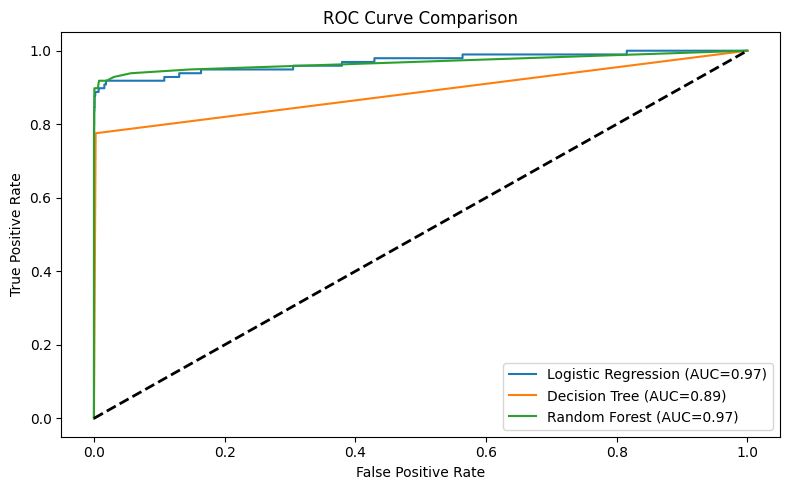

In [8]:
#  ROC Curve Comparison
plt.figure(figsize=(8, 5))
for name, (yt, yp) in results.items():
    fpr, tpr, _ = roc_curve(yt, yp)
    plt.plot(fpr, tpr, label=f'{name} (AUC={roc_auc_score(yt, yp):.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.tight_layout()
plt.show()

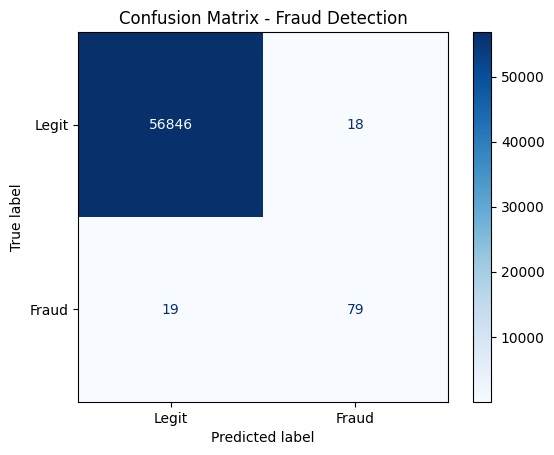

In [9]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Legit", "Fraud"])
disp.plot(cmap="Blues")

plt.title("Confusion Matrix - Fraud Detection")
plt.show()

In [10]:
import joblib
joblib.dump(model, 'fraud_model.pkl')

['fraud_model.pkl']